# Regression Analysis on California Housing Dataset

## Objective:
To evaluate the performance of various regression techniques on a real-world dataset and compare their effectiveness in predicting median house values.

##  1. Loading and Preprocessing 

In [103]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
california = fetch_california_housing()
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['Target'] = california.target

# Display the first few rows
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [104]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [105]:
df.shape

(20640, 9)

In [106]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [107]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [108]:
# Check for missing values
df.isnull().sum()


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

#### no missing values present in this data set

## Outlier Detection & Handling

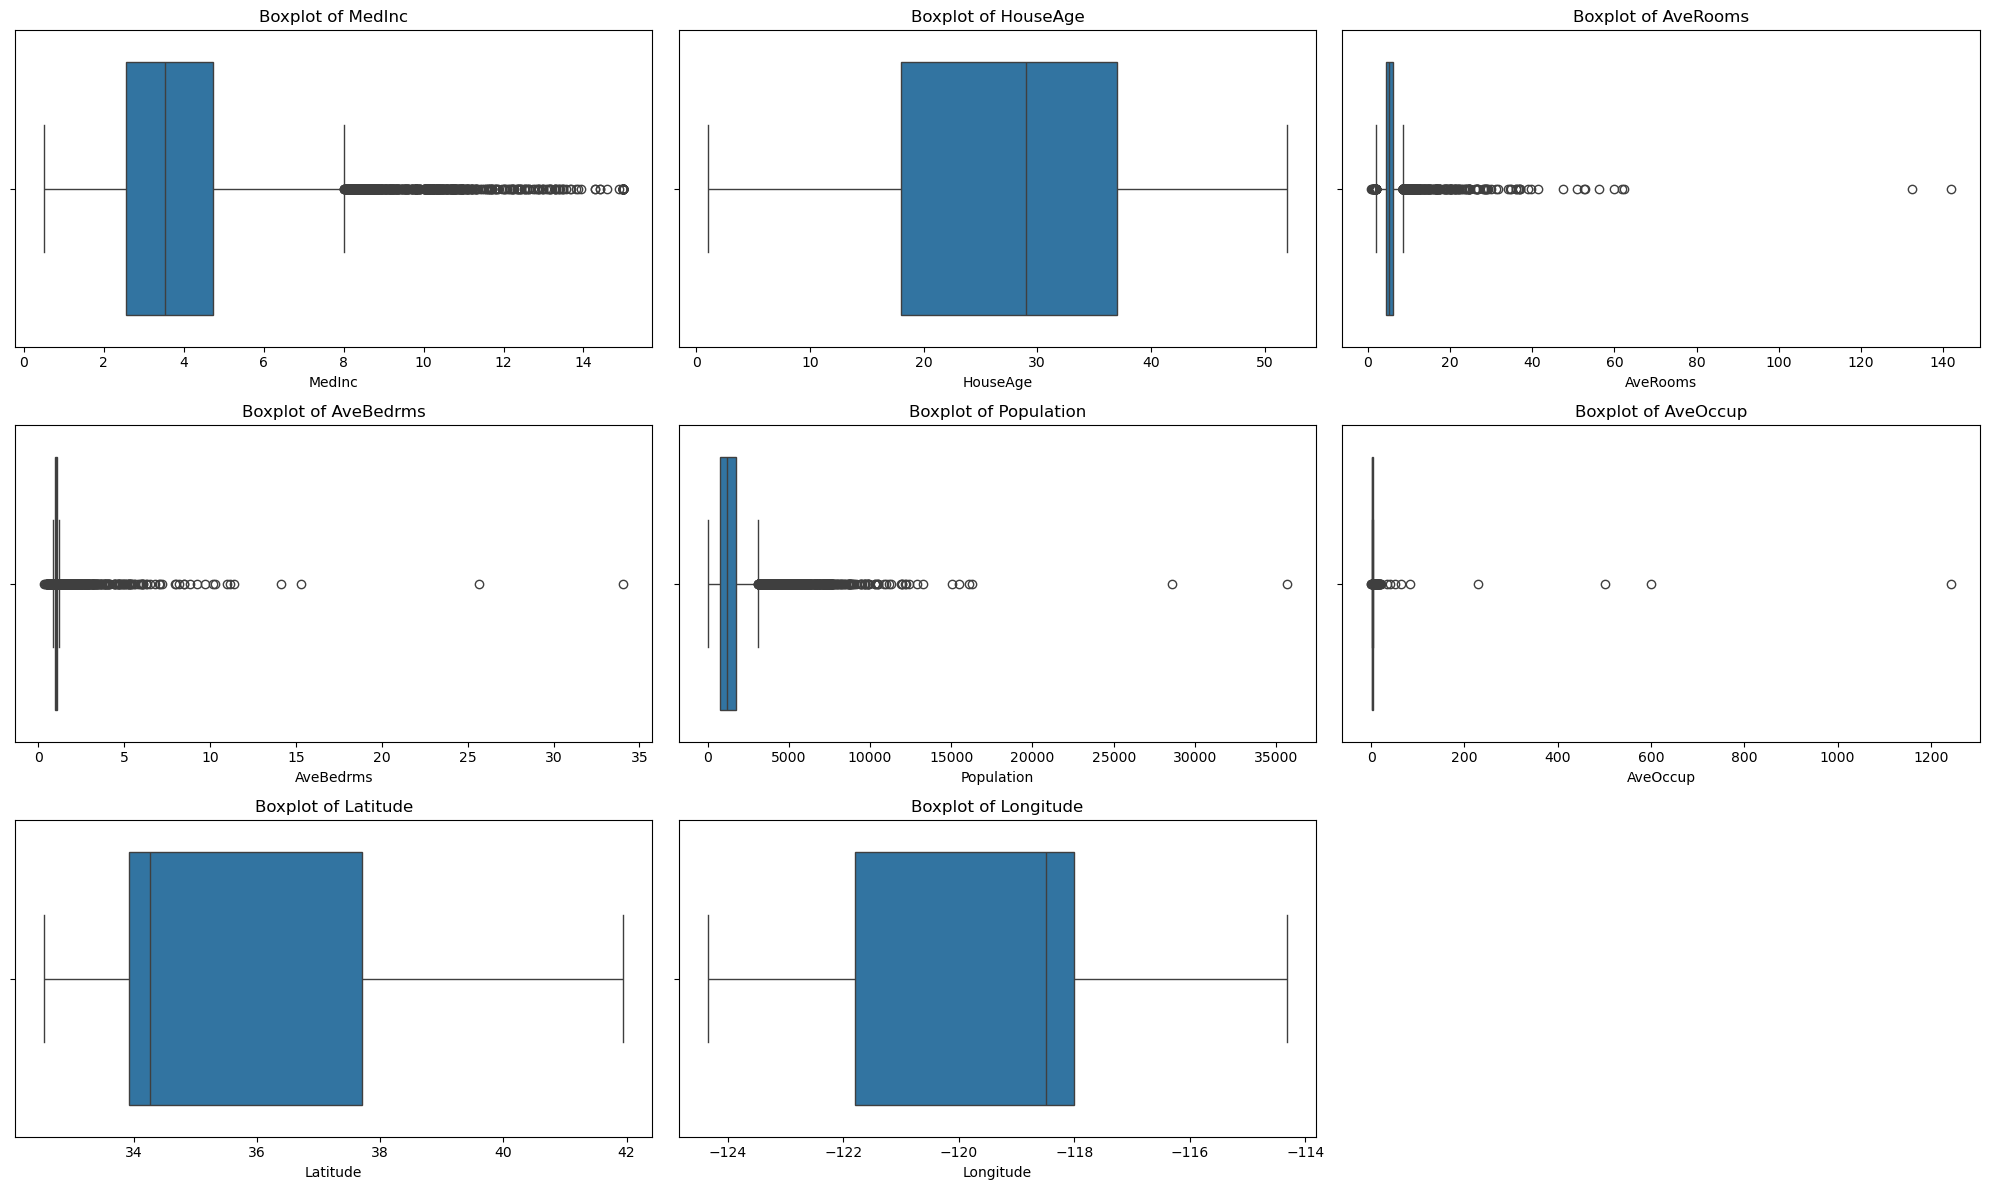

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots for each feature
plt.figure(figsize=(20, 12))
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


## IQR Method

In [113]:
from scipy.stats import zscore

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Keep only data within 1.5 IQR
df_no_outliers= df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"After IQR filtering: {df_no_outliers.shape}")



After IQR filtering: (16312, 9)


##  Feature Scaling (Standardization):

In [115]:
scaler = StandardScaler()
X = scaler.fit_transform(df_no_outliers.drop('Target', axis=1))
y = df_no_outliers['Target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## <b>2. Regression Algorithm Implementation (5 Marks)

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


### Helper Function for Evaluation:

In [119]:
def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: MSE={mse:.3f}, MAE={mae:.3f}, R2={r2:.3f}")
    return {'Model': name, 'MSE': mse, 'MAE': mae, 'R2': r2}


##  1. Linear Regression

In [121]:
lr = LinearRegression()
lr_result = evaluate_model("Linear Regression", lr, X_train, X_test, y_train, y_test)
lr_result

Linear Regression: MSE=0.317, MAE=0.424, R2=0.638


{'Model': 'Linear Regression',
 'MSE': 0.3165222770544474,
 'MAE': 0.42355274297359935,
 'R2': 0.6378964374821561}

 #### While Linear Regression provides a reasonable baseline, it may underperform compared to more advanced models like Random Forest or Gradient Boosting that can capture non-linear relationships and feature interactions more effectively.


## Decision Tree Regressor

In [124]:
dt = DecisionTreeRegressor(random_state=42)
dt_result = evaluate_model("Decision Tree", dt, X_train, X_test, y_train, y_test)
dt_result

Decision Tree: MSE=0.415, MAE=0.431, R2=0.525


{'Model': 'Decision Tree',
 'MSE': 0.41483570793748076,
 'MAE': 0.4313726631933803,
 'R2': 0.5254252272489047}

 ##  Random Forest Regressor

In [126]:
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf_result = evaluate_model("Random Forest", rf, X_train, X_test, y_train, y_test)
rf_result

Random Forest: MSE=0.179, MAE=0.291, R2=0.796


{'Model': 'Random Forest',
 'MSE': 0.17868214653496545,
 'MAE': 0.2911161350291143,
 'R2': 0.7955864515421875}

###### The Random Forest Regressor is currently the best model in terms of both accuracy and generalization. It outperforms both simple models (like Linear Regression) and even other ensemble methods (like Gradient Boosting in this case). However, it may be more resource-intensive in terms of memory and training time.

 ## Gradient Boosting Regressor

In [128]:
gb = GradientBoostingRegressor(random_state=42)
gb_result = evaluate_model("Gradient Boosting", gb, X_train, X_test, y_train, y_test)
gb_result

Gradient Boosting: MSE=0.205, MAE=0.323, R2=0.766


{'Model': 'Gradient Boosting',
 'MSE': 0.20494394931110976,
 'MAE': 0.32269545287017753,
 'R2': 0.7655427767908303}

R² of 0.776 means it explains 77.6% of the variance in the house prices, significantly better than Linear Regression (57.6%).

Lower MSE and MAE suggest higher prediction accuracy and lower average error 

### Conclusion:
Gradient Boosting appears to be one of the best-performing models in this experiment. It offers a strong balance of accuracy and generalization. However, it may come at the cost of training time and complexity.

In [158]:
svr = SVR()
svr_result = evaluate_model("SVR", svr, X_train, X_test, y_train, y_test)
svr_result

SVR: MSE=0.227, MAE=0.336, R2=0.741


{'Model': 'SVR',
 'MSE': 0.22670132681627414,
 'MAE': 0.3356347479554889,
 'R2': 0.7406521941153164}

#### Performance Interpretation:
R² of 0.741: Explains about 74.1% of the variance — better than Linear Regression and Decision Tree, but not as strong as Gradient Boosting or Random Forest.

MAE of 0.336: Moderate accuracy, prediction error ~ $33,600.

Training time and computational cost can be high with 20K+ samples, especially without GPU.

### Conclusion:
SVR offers strong performance and handles complexity better than linear models, but not as efficiently or accurately as ensemble models on this dataset. It is a good middle-ground model when working with scaled, mid-sized datasets.

## Model Evaluation and Comparison

In [164]:
results = pd.DataFrame([lr_result, dt_result, rf_result, gb_result, svr_result])
results.sort_values(by='R2', ascending=False)


,Model,MSE,MAE,R2
2,Random Forest,0.178682,0.291116,0.795586
3,Gradient Boosting,0.204944,0.322695,0.765543
4,SVR,0.226701,0.335635,0.740652
0,Linear Regression,0.316522,0.423553,0.637896
1,Decision Tree,0.414836,0.431373,0.525425


### Evaluation Summary
* Best-Performing Model: Random Forest Regressor<br>
R² = 0.7956, lowest MSE and MAE among all models.<br>

It captures non-linear patterns, handles feature interactions, and is robust to outliers.

Ideal for this kind of structured tabular data.

* Moderate Performers:
Gradient Boosting Regressor: Second best; slightly higher error but still high accuracy.

SVR: Performs well but requires scaling and is slower on large datasets.

* Worst-Performing Model: Decision Tree Regressor
Lowest R² = 0.5254, highest MSE.

Prone to overfitting without proper tuning.

* Recommendation for Real-World Use:
Use Random Forest or Gradient Boosting for production-level housing price predictions. Consider model tuning (e.g., GridSearchCV) and feature importance analysis for further improvement.